# Exploratory Data Analysis - Solution

Make sure the libraries are imported by executing this code (remember to unset Reset all runtimes before running):

In [3]:
!pip install py2neo==4.1.3 pandas matplotlib sklearn

In [0]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Next, create a connection to your Neo4j Sandbox, just as you did previously when you set up your environment. 

<div align="left">
    <img src="https://github.com/neo4j-contrib/training-v2/blob/master/Courses/DataScience/notebooks/images/sandbox-citations.png?raw=1" alt="Citation Sandbox"/>
</div>

Update the cell below to use the IP Address, Bolt Port, and Password, as you did previously.

In [0]:
# Change the line of code below to use the IP Address, Bolt Port, and Password of your Sandbox.
# graph = Graph("bolt://<IP Address>:<Bolt Port>", auth=("neo4j", "<Password>")) 
 
graph = Graph("bolt://18.207.236.67:32919", auth=("neo4j", "age-hangars-starboard"))

## Exercise

1. Create a similar query showing the articles that cite the most other papers? Note that you'll only need to do a slight tweak of the Cypher query to do this.

In [6]:
query = """
MATCH (a:Article)
RETURN size((a)-[:CITED]->()) AS cited
"""

cited_df = graph.run(query).to_data_frame()
cited_df.describe([.25, .5, .75, .9, .99])

,cited
count,51956.000
mean,0.553
std,1.301
min,0.000
25%,0.000
50%,0.000
75%,1.000
90%,2.000
99%,6.000
max,51.000


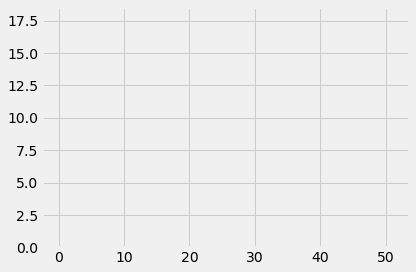

In [7]:
fig1, ax1 = plt.subplots()
ax1.hist(pd.Series(cited_df['cited'].dropna()), 1250, density=True, facecolor='g', alpha=0.75)
plt.tight_layout()
plt.show()

2. What about a distribution of the number of articles published by authors?

In [8]:
query = """
MATCH (a:Author)
RETURN size((a)<-[:AUTHOR]-()) AS published
"""

published_df = graph.run(query).to_data_frame()
published_df.describe([.25, .5, .75, .9, .99])



,published
count,80299.000
mean,1.751
std,2.064
min,1.000
25%,1.000
50%,1.000
75%,2.000
90%,3.000
99%,10.000
max,89.000
